In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Calculates the polynomial
def y(x,w):
    new_y = 0
    for i in range(len(w)):
        new_y += w[i]*x**i
    return new_y

# Calculates the MSE (Mean Square Error)
def mse(x,t,w):
     return (t-x@w).T @ (t-x@w) / len(x)

# Calculates the coefficients according to the training data
def calc_w(x,t,lamda=0):
    mat = np.linalg.inv(x.T @ x + lamda*np.eye(x.shape[1])) @ x.T @ t
    return mat

# Creates a matrix for the training data with a column of ones and a column of x raised to the power of d
def create_matrix(x,d):
    new_x = np.ones((len(x), 2))
    new_x[:,1] = x**d
    return new_x

[-2.99199884  1.00677771]


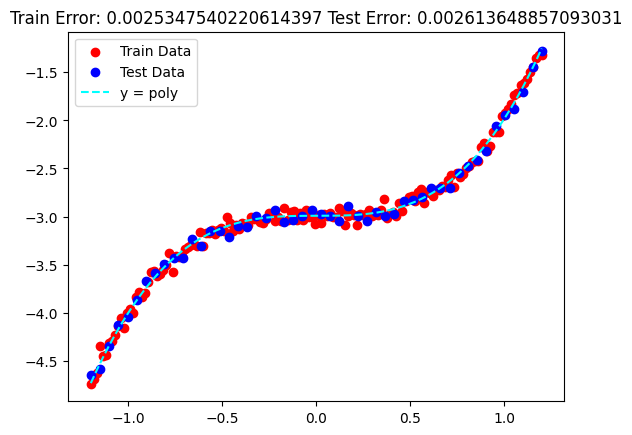

In [15]:
# Loading the data
x1_train = pd.read_csv("Dtrain_set1.csv")['X'].values
t1_train= pd.read_csv("Dtrain_set1.csv")['t'].values
x1_test = pd.read_csv("Dtest_set1.csv")['X'].values
t1_test= pd.read_csv("Dtest_set1.csv")['t'].values

# Full Training

d = 3

new_x_train = create_matrix(x1_train,d)
w = calc_w(new_x_train,t1_train)

x_grid = np.linspace(-1.2,1.2,len(x1_train))
new_x_grid = create_matrix(x_grid,d)
t_grid = new_x_grid @ w

print(w)

new_x_test = create_matrix(x1_test,d)

plt.scatter(x1_train,t1_train, marker='o', color='red', label="Train Data")
plt.scatter(x1_test,t1_test, marker='o', color='blue', label="Test Data")
plt.plot(x_grid,t_grid, color='cyan', linestyle='--', label="y = poly")
plt.title(f'Train Error: {mse(new_x_train,t1_train,w)} Test Error: {mse(new_x_test,t1_test,w)}')
plt.legend()
plt.show()

W Order 1: [-2.99199884  0.88303658]
W Order 2: [-2.99752692  0.0113643 ]
W Order 3: [-2.99199884  1.00677771]
W Order 4: [-2.99607241  0.00956455]
W Order 5: [-2.99199884  0.84312525]
W Order 6: [-2.99521237  0.00723932]
W Order 7: [-2.99199884  0.64475963]
W Order 8: [-2.99452982  0.00502428]
W Order 9: [-2.99199884  0.47367967]
W Order 10: [-2.99396722  0.00327336]


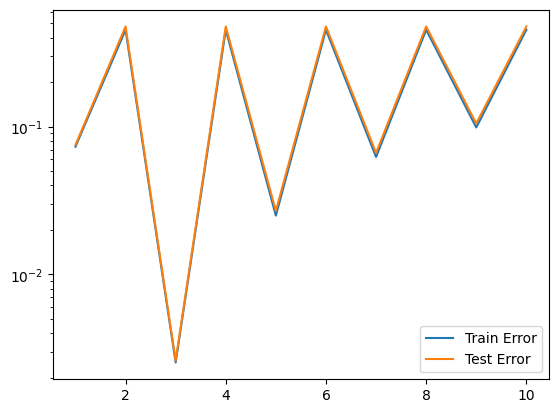

In [4]:
# Finding the optimal order for the Polynomial Regressor
train_err = []
test_err = []
w_by_order = []

for i in range(1,11):
    new_x_train = create_matrix(x1_train,i)
    new_x_test = create_matrix(x1_test,i)
    w = calc_w(new_x_train,t1_train)
    print(f'W Order {i}: {w}')
    w_by_order.append(w)
    train_err.append(mse(new_x_train,t1_train,w))
    test_err.append(mse(new_x_test,t1_test,w))

x = range(1, len(train_err) + 1)

# Prints for the data

# for i in range(len(train_err)):
#     print(f'{i} Order Train Error: {train_err[i]}')

# for i in range(len(test_err)):
#     print(f'{i} Order Test Error: {test_err[i]}')

# for i in range(len(w_by_order)):
#     print(f'{i} Order Coefficients: {w_by_order[i]}')

plt.plot(x,train_err, label="Train Error")
plt.plot(x,test_err, label="Test Error")
plt.yscale('log')
plt.legend()


[2.07973419 3.92741816]


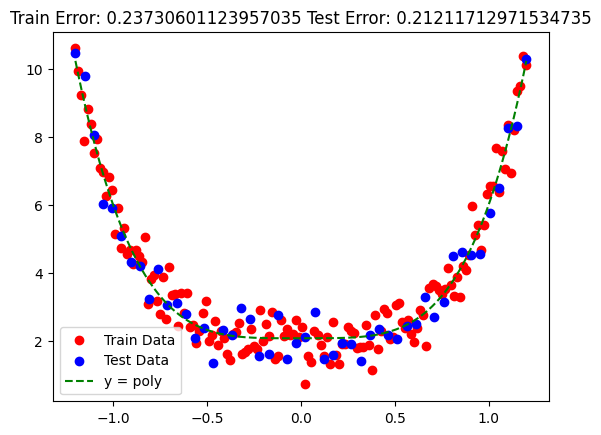

In [5]:
# Loading the data
x2_train = pd.read_csv("Dtrain_set2.csv")['X'].values
t2_train= pd.read_csv("Dtrain_set2.csv")['t'].values
x2_test = pd.read_csv("Dtest_set2.csv")['X'].values
t2_test= pd.read_csv("Dtest_set2.csv")['t'].values

# Full Training

d = 4

new_x_train = create_matrix(x2_train,d)
w = calc_w(new_x_train,t2_train)

x_grid = np.linspace(-1.2,1.2,len(x2_train))
new_x_grid = create_matrix(x_grid,d)
t_grid = new_x_grid @ w

print(w)

new_x_test = create_matrix(x2_test,d)

plt.scatter(x2_train,t2_train, marker='o', color='red', label="Train Data")
plt.scatter(x2_test,t2_test, marker='o', color='blue', label="Test Data")
plt.plot(x_grid,t_grid, color='green', linestyle='--', label="y = poly")
plt.title(f'Train Error: {mse(new_x_train,t2_train,w)} Test Error: {mse(new_x_test,t2_test,w)}')
plt.legend()
plt.show()

W Order 1: [3.75243299e+00 3.69718033e-03]
W Order 2: [1.34403022 4.95104873]
W Order 3: [3.75243299 0.02003053]
W Order 4: [2.07973419 3.92741816]
W Order 5: [3.75243299 0.02054242]
W Order 6: [2.43794618 2.96122885]
W Order 7: [3.75243299 0.01622446]
W Order 8: [2.66194946 2.16472812]
W Order 9: [3.75243299 0.01149358]
W Order 10: [2.81780918 1.55425058]


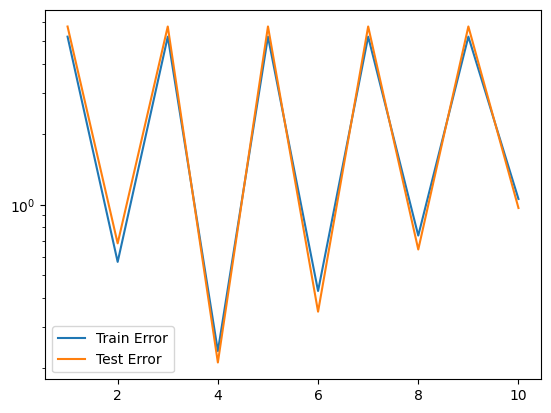

In [6]:
# Finding the optimal order for the Polynomial Regressor
train_err = []
test_err = []
w_by_order = []

for i in range(1,11):
    new_x_train = create_matrix(x2_train,i)
    new_x_test = create_matrix(x2_test,i)
    w = calc_w(new_x_train,t2_train)
    print(f'W Order {i}: {w}')
    w_by_order.append(w)
    train_err.append(mse(new_x_train,t2_train,w))
    test_err.append(mse(new_x_test,t2_test,w))

x = range(1,len(train_err) + 1)

# Prints for the data

# for i in range(len(train_err)):
#     print(f'{i} Order Train Error: {train_err[i]}')

# for i in range(len(test_err)):
#     print(f'{i} Order Test Error: {test_err[i]}')

# for i in range(len(w_by_order)):
#     print(f'{i} Order Coefficients: {w_by_order[i]}')

plt.plot(x,train_err, label="Train Error")
plt.plot(x,test_err, label="Test Error")
plt.yscale('log')
plt.legend()
